<a href="https://colab.research.google.com/github/jul1998/Pandas-Python/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [2]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [3]:
df.columns = ['DATE', 'TAG', 'POSTS']


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [5]:
df.shape

(2398, 3)

**Challenge**: Count the number of entries in each column of the dataframe

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.count()

DATE     2398
TAG      2398
POSTS    2398
dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [6]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,41921
c,391110
c#,1574381
c++,785066
delphi,50403
go,66564
java,1880561
javascript,2460705
perl,67390


In [7]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,173,173
c,173,173
c#,174,174
c++,173,173
delphi,173,173
go,158,158
java,173,173
javascript,173,173
perl,173,173


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [8]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [24]:
df['DATE'] = pd.to_datetime(df['DATE'])
#df['DATE'] = pd.to_datetime(df['DATE']).dt.timestamp()
#df['DATE'] = pd.to_numeric(df['DATE'])

In [25]:
#df["DATE"] = df["DATE"].dt.strftime('%Y-%m-%d')
print(type(pd.to_datetime(df['DATE'][1])))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [43]:
df["DATE"]

0      2008-07-01
1      2008-08-01
2      2008-08-01
3      2008-08-01
4      2008-08-01
          ...    
2393   2022-12-01
2394   2022-12-01
2395   2022-12-01
2396   2022-12-01
2397   2022-12-01
Name: DATE, Length: 2398, dtype: datetime64[ns]

## Data Manipulation



In [44]:
reshape_df = df.pivot(index="DATE", values="POSTS", columns="TAG")

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [45]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,319.0,1644.0,754.0,104.0,NaN,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,723.0,127.0,611.0,507.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1730.0,734.0,141.0,NaN,957.0,580.0,97.0,501.0,450.0,1.0,158.0,NaN


In [46]:
reshape_df.fillna(0, inplace=True)

In [47]:
reshape_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,319.0,1644.0,754.0,104.0,0.0,1130.0,634.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,723.0,127.0,611.0,507.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1730.0,734.0,141.0,0.0,957.0,580.0,97.0,501.0,450.0,1.0,158.0,0.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [15]:
reshape_df.count()

TAG
assembly      174
c             174
c#            174
c++           174
delphi        174
go            174
java          174
javascript    174
perl          174
php           174
python        174
r             174
ruby          174
swift         174
dtype: int64

In [48]:
reshape_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [18]:
import matplotlib.pyplot as plt

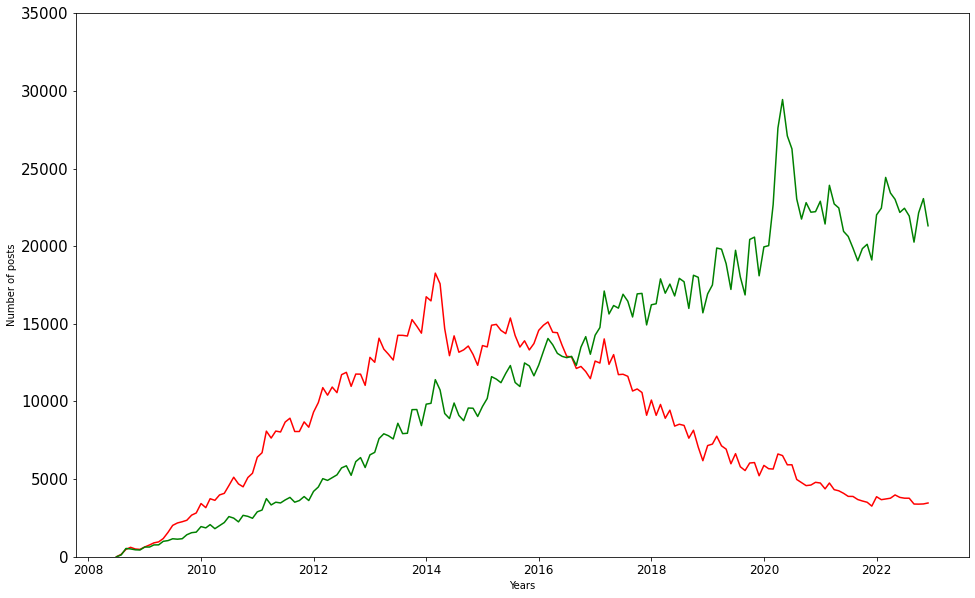

In [63]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylim(0, 35000)
plt.ylabel("Number of posts")
plt.xlabel("Years")
plt.plot(reshape_df.index, reshape_df.php, color="red")
plt.plot(reshape_df.index, reshape_df.python, color="green")

In [68]:
reshape_df.columns.name

'TAG'

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

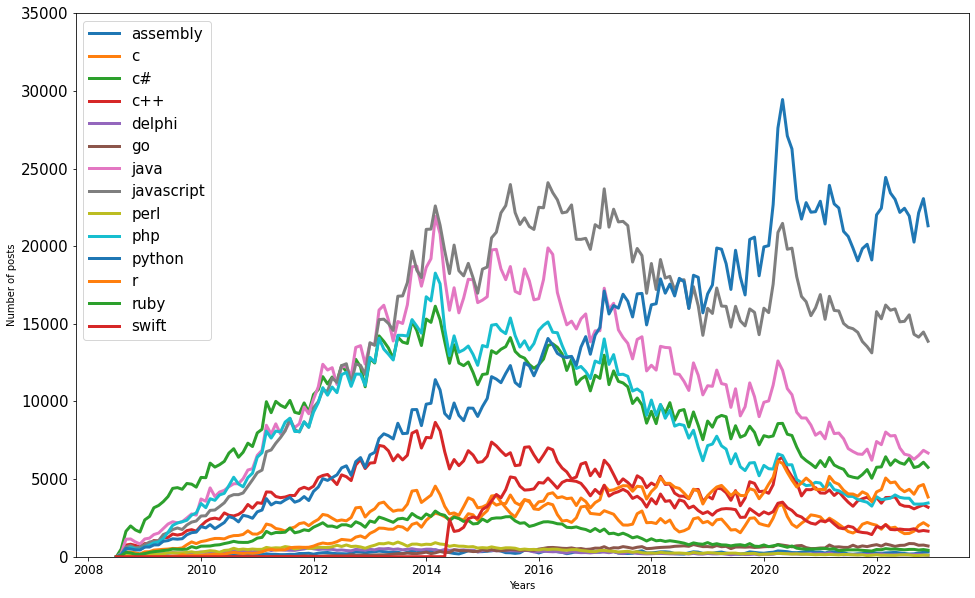

In [79]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylim(0, 35000)
plt.ylabel("Number of posts")
plt.xlabel("Years")
for col in reshape_df.columns:
  plt.plot(reshape_df.index, reshape_df[col], label=reshape_df[col].name, linewidth=3)
plt.legend(markerfirst=True, fancybox=True, fontsize=15)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

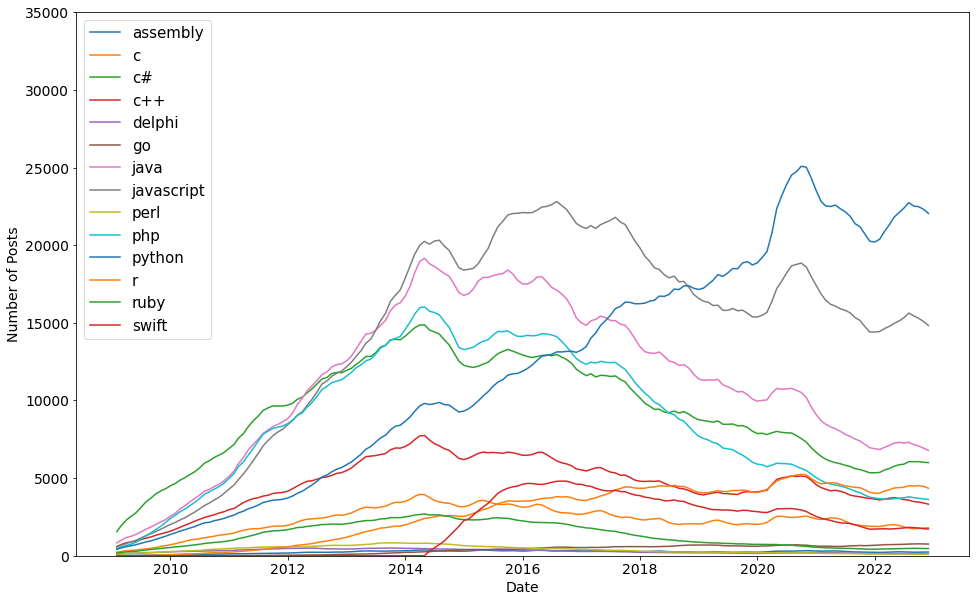

In [90]:
# The window is number of observations that are averaged

roll_df = reshape_df.rolling(window=8).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for col in roll_df.columns:
  plt.plot(roll_df.index, roll_df[col], label=roll_df[col].name)
plt.legend(markerfirst=True, fancybox=True, fontsize=15)